# Module 4: Feature Detection -  Binary Image Analysis 
****

In computer vision, a feature is a part of an image that has some distinguishable characteristics that can be used to identify it or distinguish it from other features. These characteristics can include things like edges, corners, blobs, or other patterns in the image.

Feature detection algorithms are designed to identify and locate these features in an image. The most common types of features used in computer vision are corners and edges, as they are typically easy to detect and provide a lot of useful information about the image.

The process of feature detection involves analyzing the image to identify areas where features are likely to be found. This is usually done by searching for areas of high contrast or regions where there are abrupt changes in color or texture.

Once potential feature points are identified, feature detection algorithms will typically compute a descriptor for each feature. The descriptor is a mathematical representation of the feature that captures its key characteristics. This descriptor is then used to match features between images, or to identify similar features in different images.

### Example

Most of you will have played the jigsaw puzzle games. You get a lot of small pieces of an image, where you need to assemble them correctly to form a big real image. The question is, how you do it? What about the projecting the same theory to a computer program so that computer can play jigsaw puzzles? If the computer can play jigsaw puzzles, why can't we give a lot of real-life images of a good natural scenery to computer and tell it to stitch all those images to a big single image? If the computer can stitch several natural images to one, what about giving a lot of pictures of a building or any structure and tell computer to create a 3D model out of it?

Well, the questions and imaginations continue. But it all depends on the most basic question: How do you play jigsaw puzzles? How do you arrange lots of scrambled image pieces into a big single image? How can you stitch a lot of natural images to a single image?

The answer is, we are looking for specific patterns or specific features which are unique, can be easily tracked and can be easily compared. If we go for a definition of such a feature, we may find it difficult to express it in words, but we know what they are. If someone asks you to point out one good feature which can be compared across several images, you can point out one. That is why even small children can simply play these games. We search for these features in an image, find them, look for the same features in other images and align them. That's it. (In jigsaw puzzle, we look more into continuity of different images). All these abilities are present in us inherently.

So our one basic question expands to more in number, but becomes more specific. What are these features?

<img src="Graphics/search_1.png">

<img src="Graphics/search_2.png">

In [1]:
#Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Saving an image. 0 for grayscale. 1 for color. -1 for color with a alpha channel. 
img = cv2.imread('Graphics/image2.png',0)

#How many elements are in that data. 
print(img.size)

#What is the shape of the array.
print(img.shape)

#What type are the elements.
print(img.dtype)

#What is the first element
print(img[0][0])

#Print my data
print(img)

225
(15, 15)
uint8
255
[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255   0 255 255 255 255 255 255 255   0 255 255 255]
 [255 255   0   0   0 255 255 255 255 255   0   0   0 255 255]
 [255 255 255   0 255 255 255 255 255 255 255   0 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255   0 255 255 255 255 255 255 255   0 255 255 255]
 [255 255 255   0 255 255 255 255 255 255 255   0 255 255 255]
 [255 255 255   0 255 255 255 255 255 255 255   0 255 255 255]
 [255 255 255   0   0   0   0   0   0   0   0   0 255 255 255]
 [255 255 255 255   0   0   0   0   0   0   0 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]]


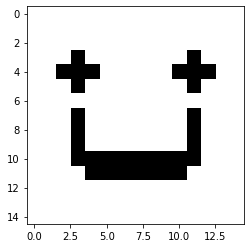

In [2]:
plt.imshow(img, cmap="gray")

In [3]:
# Convert to 0 and 1 and keep as an integer. 
img = np.uint8(img/255)

In [4]:
print(img)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1 1 0 1 1 1]
 [1 1 0 0 0 1 1 1 1 1 0 0 0 1 1]
 [1 1 1 0 1 1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1 1 0 1 1 1]
 [1 1 1 0 1 1 1 1 1 1 1 0 1 1 1]
 [1 1 1 0 1 1 1 1 1 1 1 0 1 1 1]
 [1 1 1 0 0 0 0 0 0 0 0 0 1 1 1]
 [1 1 1 1 0 0 0 0 0 0 0 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


## Results

+ 0 represents absence of material indicated by light passing.
+ 1 represents material which light has not passed. 


In [5]:
# Let's make arrays out of all the external corners.  Sepearte Varialbes to illustrate.   Excercise:  Make them 3D arrays to start.
exCorner1 = np.array([[[1,1],[1,0]]])
exCorner2 = np.array([[[1,1],[0,1]]])
exCorner3 = np.array([[[1,0],[1,1]]])
exCorner4 = np.array([[[0,1],[1,1]]])

# Combine all the external corners into one array.
exCorner = np.concatenate((exCorner1,exCorner2,exCorner3,exCorner4), axis=0)
print("The first external corner is:")
print(exCorner[0])

# Let's make arrays out of all the internal corners.
inCorner1 = np.array([[[0,0],[0,1]]])
inCorner2 = np.array([[[0,0],[1,0]]])
inCorner3 = np.array([[[0,1],[0,0]]])
inCorner4 = np.array([[[1,0],[0,0]]])

# Combine all the internal corners into one array.
inCorner = np.concatenate((inCorner1,inCorner2, inCorner3, inCorner4), axis=0)
print("The first internal corner is:")
print(inCorner[0])

The first external corner is:
[[1 1]
 [1 0]]
The first internal corner is:
[[0 0]
 [0 1]]


Number of holes: 3


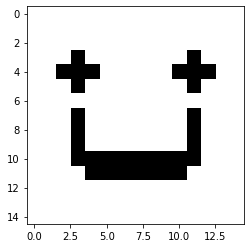

In [7]:
# Write the function to search the image for the number of holes. 
def count_holes(img):
    
    #Save the height and width.
    h = img.shape[0]
    w = img.shape[1]

    # variables to return the external and internal corner counts
    e = 0
    i = 0

    #For each row in our grid. y = row
    for y in range(0,h-1):
        #Search each pixel in the row. x = pixel
        for x in range(0,w-1):

            curFrame = np.array([[img[y,x],img[y,x + 1]],[img[y+1,x],img[y+1,x+1]]])

            # check to see if the arrays are equal.
            for n in range(0,exCorner.shape[0]):
                
                if(np.array_equal(exCorner[n], curFrame)):
                    e += 1
                if(np.array_equal(inCorner[n], curFrame)):
                    i += 1

    return(np.uint8((e-i)/4))


number_of_holes = count_holes(img)
print("Number of holes:",number_of_holes)
plt.imshow(img, cmap="gray")

## Recursion

Defining a thing in terms of itself.  For example, saying "tired" is defined as "the feeling you get when you are tired".  In our case, a function that calls itself is called a **Recursive Function**.<br>

This occurs in mathematical calucations; the most common example of this is called **"factorial"**.<br>

The factorial of any number n, usually written as n!.

n! = n * n-1 * ...* 3 * 2 * 1
0! = 1

In [ ]:
def factorial(n):

    f = 1

    for i in range(0,n):
        f = f * (i+1)

    return(f)

num = factorial(4)
print(num)

24


If you look closely:<p>

4! = 4 * 3 * 2 * 1<br>
3! = 3 * 2 * 1<br>
therefore... 4! = 4 * 3!<br>

Factorial in a recursive function:

In [ ]:
def factorial(n):
    if (n == 1):
        return(1)
    else:
        return n * factorial(n-1)

num = factorial(4)
print(num)

24


4 way and 8 way neighbors. Explain

<img src="../Graphics/search_3.png">

<img src="../Graphics/search_4.png">

<img src="../Graphics/search_5.png">

### Implement the recursive connected compoments algorithm <br>

I'll give you the structure of the code and a new image to search.  Implement the rest of the code.  Reference the example above. 

In [ ]:
img_connected = np.array([[1,1,0,1,1,1,0,1],[1,1,0,1,0,1,0,1],[1,1,1,1,0,0,0,1],[0,0,0,0,0,0,0,1],[1,1,1,1,0,1,0,1],[0,0,0,1,0,1,0,1],[1,1,0,1,0,0,0,1],[1,1,0,1,0,1,1,1]])
print(img_connected)

[[1 1 0 1 1 1 0 1]
 [1 1 0 1 0 1 0 1]
 [1 1 1 1 0 0 0 1]
 [0 0 0 0 0 0 0 1]
 [1 1 1 1 0 1 0 1]
 [0 0 0 1 0 1 0 1]
 [1 1 0 1 0 0 0 1]
 [1 1 0 1 0 1 1 1]]


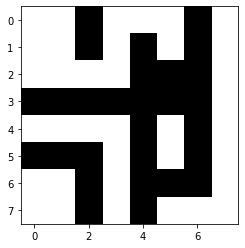

In [ ]:
plt.imshow(img_connected, cmap="gray")

In [ ]:
def recursive_connected_components(img):

    # convert to a signed integer so you can use negative numbers
    img = np.int8(img)

    # Negate img
    LB = img - 1

    # Define label
    label = 0

    find_components(LB, label)

    print(LB)

def find_components(LB, label):

    #Save the height and width.
    h = LB.shape[0]
    w = LB.shape[1]

    for L in range(0,h):
        for P in range(0,w):
            if(LB[L,P] == -1):
                label = label + 1
                search(LB, label, L, P)

def search(LB, label, L, P):

    LB[L,P] = label

    # Implement the rest of the algorithm 
    Nset = neighbors(L,P)

    # L', P' are the pixel locations to be compared.  Reference algorithm above.

    # For each LB[L',P'] in Nset
    #  if LB[L',P'] == -1
    #  then search(LB, label, L', P')




def neighbors(L,P):
    # What are the neighbors of this pixel.  Reference algorithm above.



negate = recursive_connected_components(img_connected)
print(negate)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0]
 [ 0  0 -1 -1 -1  0  0  0  0  0 -1 -1 -1  0  0]
 [ 0  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0]
 [ 0  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0]
 [ 0  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0]
 [ 0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0]
 [ 0  0  0  0 -1 -1 -1 -1 -1 -1 -1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [ ]:
# Open CV

# cv2.connectedComponents